In [94]:
from matplotlib import pyplot as plt
import requests
import json
import cv2
import base64
import numpy as np 
import glob

In [95]:
image = 'data/test/hot_dog/133012.jpg'
url = 'http://localhost:8501/v1/models/hotdog:predict'

In [96]:
images = glob.glob('data/test/**/*.jpg', recursive=True)

# Using Request

In [97]:
image_content = []
for image in images[:10]:
    img = cv2.imread(image)
    img = cv2.resize(img, (128, 128))
    image_content.append(img)
    
image_content = np.array(image_content)

In [98]:
body = {"instances": image_content.tolist()} 

In [99]:
r = requests.post(url, data=json.dumps(body), headers = headers)
predictions = r.json()

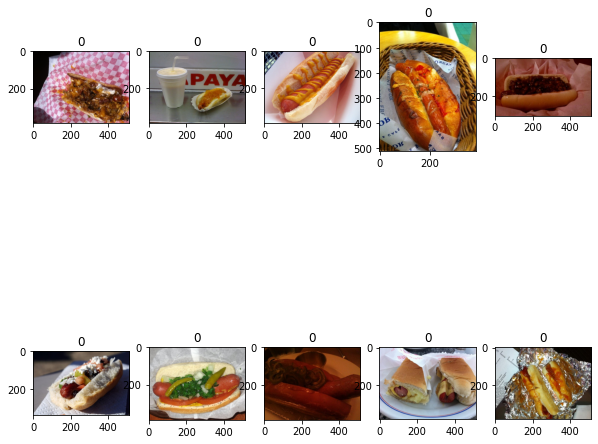

In [100]:
row, column = 2, 5
count = 0
plt.figure(figsize=(10, 10))
for index, pred in enumerate(predictions['predictions']):
    select = np.argmax(pred)
    img = cv2.imread(images[index])
    
    count += 1
    plt.subplot(row, column, count)
    
    plt.title(select)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))